In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import tree

In [4]:
dataset = pd.read_csv('D:\work\FPT\DBP391\Data\heart.csv')

In [5]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


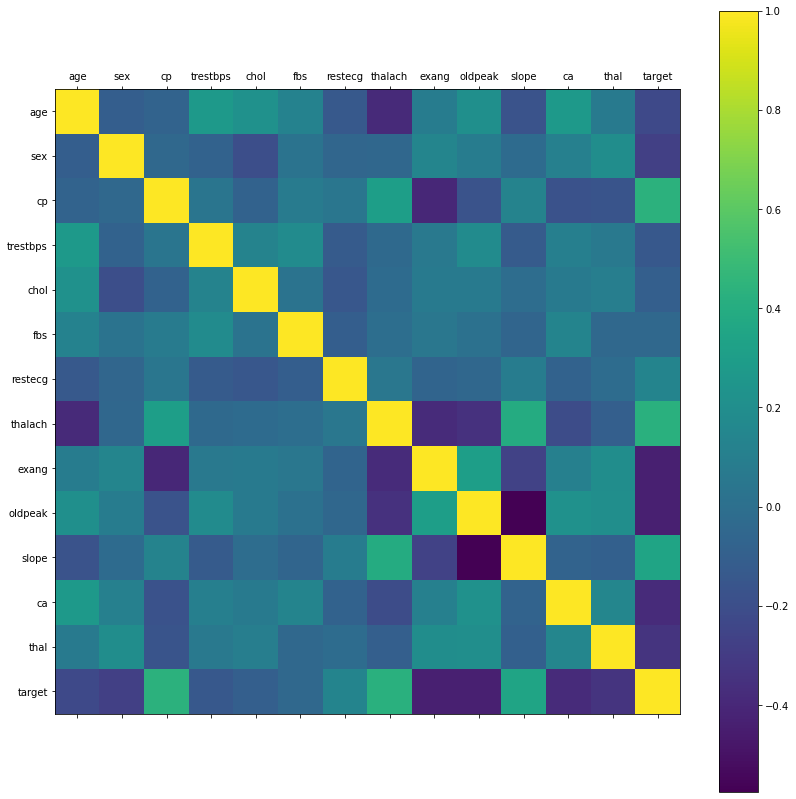

In [7]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

In [8]:
dataset["target"]

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [9]:
normal = 0
abnormal = 0
for i in range(1025):
    if dataset._get_value(i, "target") == 0:
        normal += 1
    else:
        abnormal += 1
print("normal:", normal)   
print("abnormal:", abnormal)

normal: 499
abnormal: 526


In [10]:
dataset["target"]

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

Text(0.5, 1.0, 'Count of each Target Class')

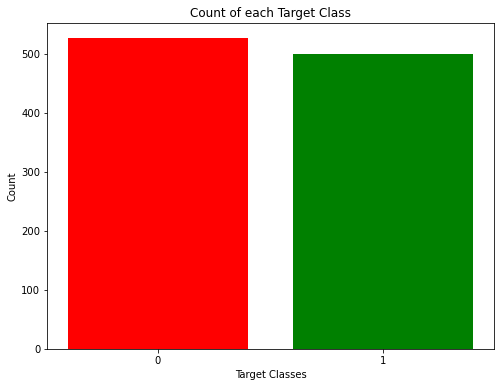

In [11]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

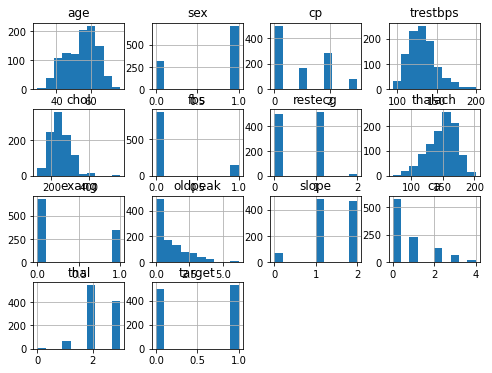

In [12]:
dataset.hist()

Text(0.5, 1.0, 'Count of each Target Class')

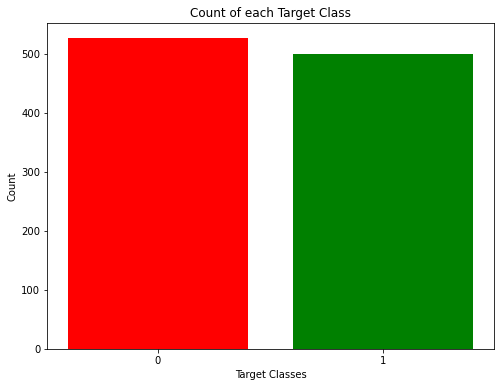

In [13]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')


In [14]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [15]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0


In [16]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [17]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [18]:
accuracies = {}
acc_nb = nb.score(X_test,y_test)*100
accuracies['Naive Bayes'] = acc_nb
print("Accuracy of Naive Bayes: {:.2f}%".format(acc_nb))

Accuracy of Naive Bayes: 84.37%


In [19]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
acc_KNN = knn.score(X_test,y_test)*100
accuracies['KN-Neighbor'] = acc_KNN
print("Accuracy of KNN: {:.2f}%".format(acc_KNN))

Accuracy of KNN: 85.25%


In [21]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
acc_dt = dt.score(X_test,y_test)*100
accuracies['Decision tree'] = acc_dt
print("Accuracy of decision tree: {:.2f}%".format(acc_dt))

Accuracy of decision tree: 99.12%


In [23]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_2 <= 0.50
|   |--- feature_11 <= 0.50
|   |   |--- feature_12 <= 2.50
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- feature_4 <= 1.37
|   |   |   |   |   |--- feature_7 <= -2.29
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_7 >  -2.29
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_4 >  1.37
|   |   |   |   |   |--- feature_4 <= 2.25
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  2.25
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_8 >  0.50
|   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |--- feature_0 <= 1.00
|   |   |   |   |   |   |--- feature_3 <= -0.95
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_3 >  -0.95
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  1.00
|   |   |   |   |   |   |--- class: 1
|   |   |--- feature_12 >  

In [25]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
acc_rf = rf.score(X_test,y_test)*100
accuracies['Random forest'] = acc_rf
print("Accuracy of random forest: {:.2f}%".format(acc_dt))

Accuracy of random forest: 99.12%
